In [21]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl

In [22]:
import pandas_datareader as web
amd = web.get_data_yahoo('AMD', 
                          start=datetime(2010, 1, 1), 
                          end=datetime(2019, 12, 31))

In [23]:
amd.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,9.77,9.63,9.75,9.68,9396500,9.68
2010-01-04,9.90,9.68,9.79,9.70,18748700,9.70
2010-01-05,9.90,9.68,9.71,9.71,22145700,9.71
2010-01-06,9.76,9.55,9.68,9.57,18643400,9.57
2010-01-07,9.55,9.18,9.51,9.47,26806800,9.47


In [24]:
# Removing first row, we only want from 2010
amd = amd.iloc[1:]
amd.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,9.90,9.68,9.79,9.70,18748700,9.70
2010-01-05,9.90,9.68,9.71,9.71,22145700,9.71
2010-01-06,9.76,9.55,9.68,9.57,18643400,9.57
2010-01-07,9.55,9.18,9.51,9.47,26806800,9.47
2010-01-08,9.47,9.29,9.37,9.43,13752800,9.43


In [25]:
# calculating the simple moving average (which is just mean calculated progressively) 
# and add the result as a new column to dataframe

### We need to define two windows: Short term window and Long-term window
### and plot the graph with points where upturn and downturn happen

short_window = 100
long_window = 150

amd["100_obs_for_SMA"] = amd["Adj Close"].rolling(window=short_window).mean()
amd["150_obs_for_LMA"] = amd["Adj Close"].rolling(window=long_window).mean()
amd

,High,Low,Open,Close,Volume,Adj Close,100_obs_for_SMA,150_obs_for_LMA
Date,,,,,,,,
2010-01-04,9.900000,9.680000,9.790000,9.700000,18748700,9.700000,NaN,NaN
2010-01-05,9.900000,9.680000,9.710000,9.710000,22145700,9.710000,NaN,NaN
2010-01-06,9.760000,9.550000,9.680000,9.570000,18643400,9.570000,NaN,NaN
2010-01-07,9.550000,9.180000,9.510000,9.470000,26806800,9.470000,NaN,NaN
2010-01-08,9.470000,9.290000,9.370000,9.430000,13752800,9.430000,NaN,NaN
2010-01-11,9.440000,9.080000,9.380000,9.140000,23700100,9.140000,NaN,NaN
2010-01-12,8.920000,8.520000,8.890000,8.650000,33387100,8.650000,NaN,NaN
2010-01-13,9.200000,8.550000,8.710000,9.150000,32741900,9.150000,NaN,NaN
2010-01-14,9.260000,8.920000,9.180000,9.000000,22556600,9.000000,NaN,NaN


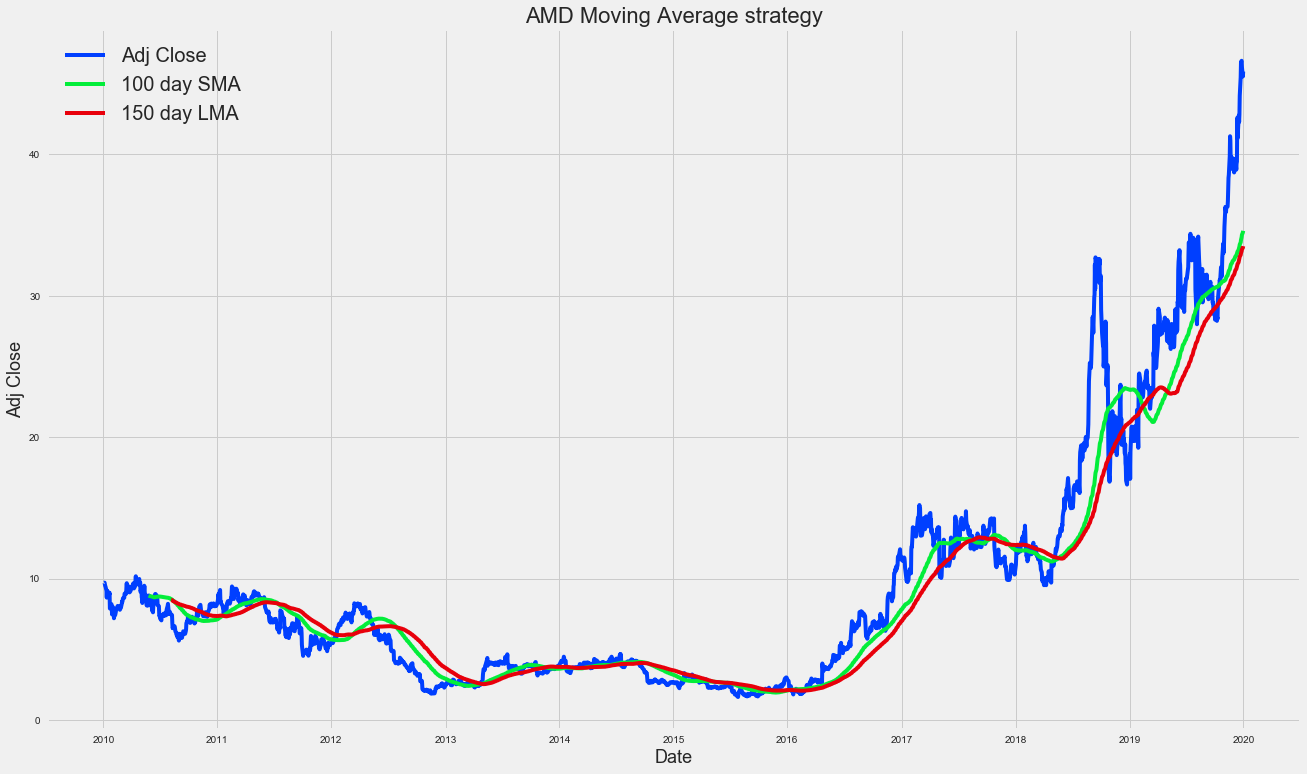

In [26]:
# Plotting Adj Close and calculated SMA (short term) and LMA (long term)

plt.style.use('seaborn-dark')
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-bright')
fig = plt.figure(figsize=(20,12))
ax1 = plt.plot(amd["Adj Close"])
ax1 = plt.plot(amd["100_obs_for_SMA"])
ax1 = plt.plot(amd["150_obs_for_LMA"])
ax1 = plt.title("AMD Moving Average strategy", fontsize=22)
ax1 = plt.xlabel("Date", fontsize=18)
ax1 = plt.ylabel("Adj Close", fontsize=18)
ax1 = plt.legend(["Adj Close", "100 day SMA", "150 day LMA"],prop={"size":20}, loc="upper left")
plt.grid(True)
plt.show()

In [27]:
mpl.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [28]:
### BUY: When MA > price
### SELL: When MA < price
# WHY? "We hope to catch the ride when the asset is trending upwards, gaining similar returns. When it trends downwards choose to sell out and wait, or short sell in order to benefit from the fall."

li = []
for i in range(amd.shape[0]):
    if amd["Adj Close"].iloc[i] > amd["100_obs_for_SMA"].iloc[i]:
        li.append("Sell")
    else:
        li.append("Buy")
amd["strategy"] = li
amd.tail()

,High,Low,Open,Close,Volume,Adj Close,100_obs_for_SMA,150_obs_for_LMA,strategy
Date,,,,,,,,,
2019-12-24,46.610001,45.770000,46.099998,46.540001,44432200,46.540001,33.9582,33.020200,Sell
2019-12-26,47.310001,45.660000,46.990002,46.630001,57562800,46.630001,34.1446,33.155333,Sell
2019-12-27,46.880001,45.980000,46.849998,46.180000,36581300,46.180000,34.3178,33.286933,Sell
2019-12-30,46.169998,44.660000,46.139999,45.520000,41149700,45.520000,34.4811,33.396733,Sell
2019-12-31,46.090000,44.919998,45.070000,45.860001,31673200,45.860001,34.6005,33.515200,Sell


In [29]:
## Encoding of categorical strategy column -> Sell = 1, Buy = 0

ll = list(amd.strategy)
for idx, val in enumerate(ll):
    if val=="Sell":
        ll[idx] = 1
    else:
        ll[idx] = 0
        
print(len(ll))

amd['strategy_encoded'] = ll
amd 

2516


,High,Low,Open,Close,Volume,Adj Close,100_obs_for_SMA,150_obs_for_LMA,strategy,strategy_encoded
Date,,,,,,,,,,
2010-01-04,9.900000,9.680000,9.790000,9.700000,18748700,9.700000,NaN,NaN,Buy,0
2010-01-05,9.900000,9.680000,9.710000,9.710000,22145700,9.710000,NaN,NaN,Buy,0
2010-01-06,9.760000,9.550000,9.680000,9.570000,18643400,9.570000,NaN,NaN,Buy,0
2010-01-07,9.550000,9.180000,9.510000,9.470000,26806800,9.470000,NaN,NaN,Buy,0
2010-01-08,9.470000,9.290000,9.370000,9.430000,13752800,9.430000,NaN,NaN,Buy,0
2010-01-11,9.440000,9.080000,9.380000,9.140000,23700100,9.140000,NaN,NaN,Buy,0
2010-01-12,8.920000,8.520000,8.890000,8.650000,33387100,8.650000,NaN,NaN,Buy,0
2010-01-13,9.200000,8.550000,8.710000,9.150000,32741900,9.150000,NaN,NaN,Buy,0
2010-01-14,9.260000,8.920000,9.180000,9.000000,22556600,9.000000,NaN,NaN,Buy,0


In [30]:
## SMA > LMA -> = 1     ;    LMA > SMA -> = 0

ll = list(amd['100_obs_for_SMA'])
ll1 = list(amd['150_obs_for_LMA'])
ll2 = []
for i, j in zip(ll, ll1):
    if i>j:
        ll2.append(1)
    else:
        ll2.append(0)
        
print(len(ll2))

amd['crossover'] = ll2
amd 

2516


,High,Low,Open,Close,Volume,Adj Close,100_obs_for_SMA,150_obs_for_LMA,strategy,strategy_encoded,crossover
Date,,,,,,,,,,,
2010-01-04,9.900000,9.680000,9.790000,9.700000,18748700,9.700000,NaN,NaN,Buy,0,0
2010-01-05,9.900000,9.680000,9.710000,9.710000,22145700,9.710000,NaN,NaN,Buy,0,0
2010-01-06,9.760000,9.550000,9.680000,9.570000,18643400,9.570000,NaN,NaN,Buy,0,0
2010-01-07,9.550000,9.180000,9.510000,9.470000,26806800,9.470000,NaN,NaN,Buy,0,0
2010-01-08,9.470000,9.290000,9.370000,9.430000,13752800,9.430000,NaN,NaN,Buy,0,0
2010-01-11,9.440000,9.080000,9.380000,9.140000,23700100,9.140000,NaN,NaN,Buy,0,0
2010-01-12,8.920000,8.520000,8.890000,8.650000,33387100,8.650000,NaN,NaN,Buy,0,0
2010-01-13,9.200000,8.550000,8.710000,9.150000,32741900,9.150000,NaN,NaN,Buy,0,0
2010-01-14,9.260000,8.920000,9.180000,9.000000,22556600,9.000000,NaN,NaN,Buy,0,0


In [32]:
amd[amd['crossover'] != amd['strategy_encoded']]

,High,Low,Open,Close,Volume,Adj Close,100_obs_for_SMA,150_obs_for_LMA,strategy,strategy_encoded,crossover
Date,,,,,,,,,,,
2010-05-27,8.800000,8.400000,8.450000,8.800000,24221900,8.800000,8.7833,NaN,Sell,1,0
2010-06-15,8.880000,8.340000,8.350000,8.820000,35702500,8.820000,8.6687,NaN,Sell,1,0
2010-06-16,9.190000,8.650000,8.730000,8.900000,33576700,8.900000,8.6789,NaN,Sell,1,0
2010-06-17,9.050000,8.710000,9.050000,8.910000,21712000,8.910000,8.6873,NaN,Sell,1,0
2010-06-18,9.050000,8.770000,8.920000,8.830000,16524200,8.830000,8.6947,NaN,Sell,1,0
2010-06-21,9.160000,8.710000,9.030000,8.800000,25872100,8.800000,8.7008,NaN,Sell,1,0
2010-08-06,7.720000,7.430000,7.490000,7.450000,33055500,7.450000,8.5428,8.492533,Buy,0,1
2010-08-09,7.520000,7.380000,7.480000,7.420000,26503200,7.420000,8.5203,8.477333,Buy,0,1
2010-08-10,7.130000,6.750000,7.060000,6.830000,80795900,6.830000,8.4947,8.458133,Buy,0,1


In [35]:
# Finding crossover points

amd['crossover_points'] = amd['crossover'].diff()

,High,Low,Open,Close,Volume,Adj Close,100_obs_for_SMA,150_obs_for_LMA,strategy,strategy_encoded,crossover,crossover_points
Date,,,,,,,,,,,,
2010-12-30,8.15,8.10,8.10,8.14,6213500,8.14,7.0923,7.350000,Sell,1,0,0.0
2010-12-31,8.19,8.05,8.14,8.18,7971200,8.18,7.1058,7.347400,Sell,1,0,0.0
2011-01-03,8.55,8.39,8.44,8.47,21152900,8.47,7.1256,7.349600,Sell,1,0,0.0
2011-01-04,8.84,8.54,8.56,8.77,26875300,8.77,7.1476,7.351133,Sell,1,0,0.0
2011-01-05,8.95,8.72,8.74,8.91,19457400,8.91,7.1718,7.352600,Sell,1,0,0.0
2011-01-06,8.94,8.67,8.92,8.69,21198200,8.69,7.1925,7.356467,Sell,1,0,0.0
2011-01-07,8.86,8.63,8.73,8.83,14062400,8.83,7.2145,7.363933,Sell,1,0,0.0
2011-01-10,9.25,8.92,9.05,9.19,42654000,9.19,7.2407,7.373400,Sell,1,0,0.0
2011-01-11,8.80,8.33,8.77,8.36,82092400,8.36,7.2601,7.378400,Sell,1,0,0.0


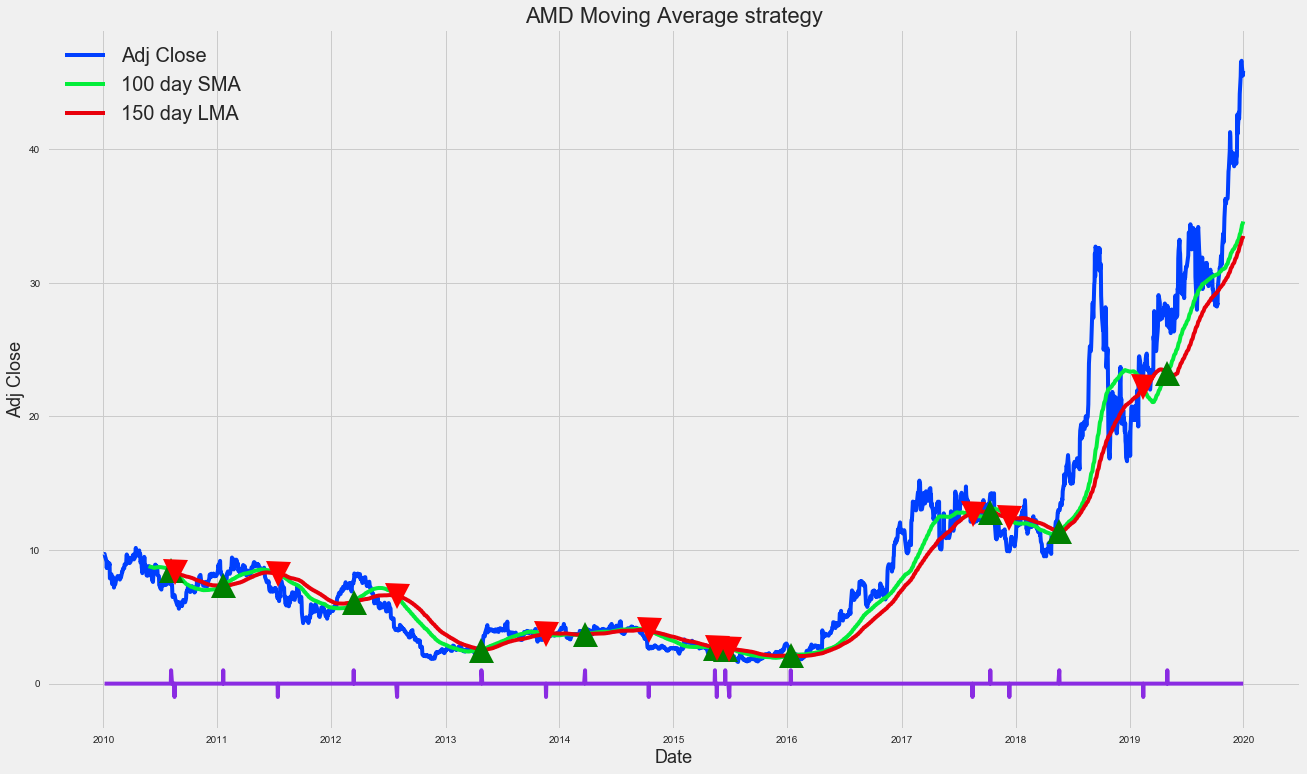

In [39]:
### TIME TO PLOT: The SMA, The LMA, The original Adj Close price and The markers for up- and down-trend

plt.style.use('seaborn-dark')
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-bright')
fig = plt.figure(figsize=(20,12))
ax1 = plt.plot(amd["Adj Close"])
ax1 = plt.plot(amd["100_obs_for_SMA"])
ax1 = plt.plot(amd["150_obs_for_LMA"])
ax1 = plt.plot(amd["crossover_points"])

# x, y co-ordinates 
ax1 = plt.plot(amd.loc[amd['crossover_points'] == 1.0].index, amd['100_obs_for_SMA'][amd['crossover_points'] == 1.0], '^' , markersize=25, color='green')
ax1 = plt.plot(amd.loc[amd['crossover_points'] == -1.0].index, amd['150_obs_for_LMA'][amd['crossover_points'] == -1.0], 'v' , markersize=25, color='red')

ax1 = plt.title("AMD Moving Average strategy", fontsize=22)
ax1 = plt.xlabel("Date", fontsize=18)
ax1 = plt.ylabel("Adj Close", fontsize=18)
ax1 = plt.legend(["Adj Close", "100 day SMA", "150 day LMA"],prop={"size":20}, loc="upper left")
plt.grid(True)
plt.show()

## LSTM to predict 'Buy' or 'Sell'

In [35]:
data = amd[['Adj Close', '100_obs_for_SMA', 'strategy_encoded']]
data

,Adj Close,100_obs_for_SMA,strategy_encoded
Date,,,
2010-01-05,9.710000,NaN,0
2010-01-06,9.570000,NaN,0
2010-01-07,9.470000,NaN,0
2010-01-08,9.430000,NaN,0
2010-01-11,9.140000,NaN,0
2010-01-12,8.650000,NaN,0
2010-01-13,9.150000,NaN,0
2010-01-14,9.000000,NaN,0
2010-01-15,8.840000,NaN,0


In [36]:
data.dropna(inplace=True)
data

c:\users\sys\documents\ml-datascience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Adj Close,100_obs_for_SMA,strategy_encoded
Date,,,
2010-05-27,8.800000,8.7833,1
2010-05-28,8.570000,8.7719,0
2010-06-01,8.140000,8.7576,0
2010-06-02,8.540000,8.7483,0
2010-06-03,8.690000,8.7409,0
2010-06-04,8.110000,8.7306,0
2010-06-07,7.710000,8.7212,0
2010-06-08,7.770000,8.7074,0
2010-06-09,7.610000,8.6935,0


In [37]:
import tensorflow.keras as keras
from functools import partial
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, TimeDistributed, LSTM, Dense, Bidirectional, Dropout, ConvLSTM2D, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Convolution1D, BatchNormalization, LeakyReLU


c:\users\sys\documents\ml-datascience\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sys\documents\ml-datascience\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sys\documents\ml-datascience\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\sys\documents\ml-datascience\lib\site-packages\tensorflow\

In [62]:
X_train = data.iloc[:2001, 0:2]
X_test = data.iloc[2001:,0:2]
Y_train = data.iloc[:2001, 2]
Y_test = data.iloc[2001:, 2]

# Convert to Numpy Array
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()
X_test = X_test.to_numpy()

In [63]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2001, 1, 2) (2001,) (415, 1, 2) (415,)


In [64]:
keras.backend.clear_session()

n_steps = X_train.shape[1]
n_features = X_train.shape[2]

model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 100)            41200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 71,921
Trainable params: 71,921
Non-trainable params: 0
_________________________________________________________________


Train on 2001 samples, validate on 415 samples
Epoch 1/50
2001/2001 [==============================] - 2s 751us/sample - loss: 0.3056 - acc: 0.5322 - val_loss: 0.1685 - val_acc: 0.8361
Epoch 2/50
2001/2001 [==============================] - 0s 156us/sample - loss: 0.1769 - acc: 0.7756 - val_loss: 1.3325 - val_acc: 0.6699
Epoch 3/50
2001/2001 [==============================] - 0s 159us/sample - loss: 0.1305 - acc: 0.9075 - val_loss: 1.3545 - val_acc: 0.9084
Epoch 4/50
2001/2001 [==============================] - 0s 163us/sample - loss: 0.1066 - acc: 0.9420 - val_loss: 0.8262 - val_acc: 0.9398
Epoch 5/50
2001/2001 [==============================] - 0s 164us/sample - loss: 0.0860 - acc: 0.9530 - val_loss: 1.2155 - val_acc: 0.8819
Epoch 6/50
2001/2001 [==============================] - 0s 154us/sample - loss: 0.0713 - acc: 0.9555 - val_loss: 0.7779 - val_acc: 0.9301
Epoch 7/50
2001/2001 [==============================] - 0s 161us/sample - loss: 0.0541 - acc: 0.9595 - val_loss: 0.2129 - val

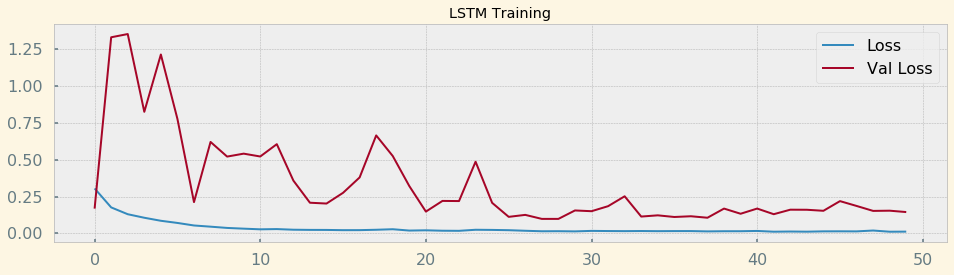

In [65]:
model.fit(X_train, Y_train, epochs=50, verbose=1, validation_data=[X_test, Y_test], use_multiprocessing=True)

plt.figure(figsize=(16,4))
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.legend(loc=1)
plt.title('LSTM Training')
plt.show()

In [60]:
y_preds = model.predict_classes(X_test)

In [75]:
preds_list = []

for i in y_preds:
    preds_list.append(i[0])
    
c = 0
for i, j in zip(y_preds, Y_test):
    if i!=j:
        c+=1

print("Number of wrong predictions on test set: ", c)

Number of wrong predictions on test set:  8
